In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = "/workspaces/longeval-code/clef25/evaluation-in-progress/evaluation-results-in-progress/replicability"
# datasets = "sci-20250430-test"
datasets = "web-20250430-test"

In [3]:
tab = []
for team in os.listdir(os.path.join(results, datasets)):
    team_path = os.path.join(results, datasets, team)
    for run_id in os.listdir(team_path):
        run_directory = os.path.join(team_path, run_id)
        for version in os.listdir(run_directory):
            run_directory_version = os.path.join(run_directory, version)
            with open(os.path.join(run_directory_version, "results.json"), 'r') as f:
                r = json.load(f)
            tab.extend(r)

In [4]:
table = pd.DataFrame(tab)

In [5]:
# some teams only submit to the new task
table = table[~table["er"].isna()]

In [6]:
table["valid"] = table["arp"].apply(lambda x: x["ndcg"] > 0)
table = table[table["valid"]]
table.drop(columns=["valid"], inplace=True)

In [7]:
def make_table(table, measures):
    df = table.copy()
    meta_columns = ["team", "run_id", "version", "snapshot"]
    meata_measures = df.columns.difference(meta_columns)
    
    for measure in measures:
        for meta_measure in meata_measures:
            if meta_measure=="ttest":
                df[measure + "_" + meta_measure] = df.apply(lambda x: x[meta_measure]["advanced"].get(measure), axis=1)
            else:
                df[measure + "_" + meta_measure] = df.apply(lambda x: x[meta_measure].get(measure), axis=1)
    
    return df.drop(columns=meata_measures)
        

In [8]:
measures = ["ndcg_cut_10"]

df = make_table(table, measures)

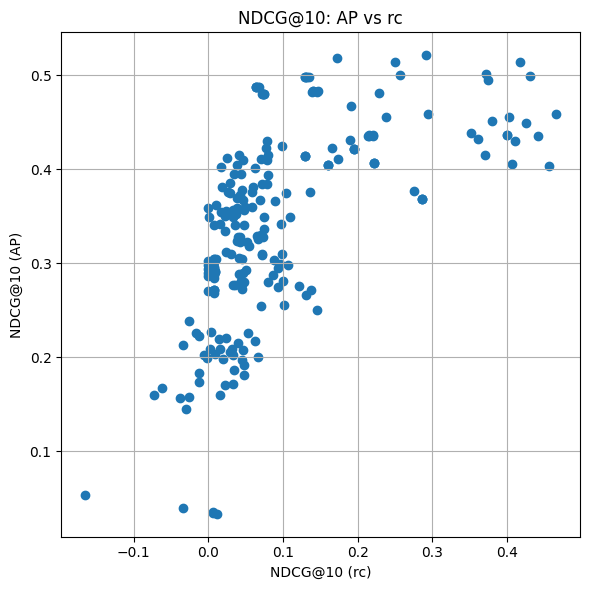

In [11]:
# Prepare data
data = df.drop_duplicates()[["run_id", "ndcg_cut_10_ap", "ndcg_cut_10_dri"]]

# Create plot
plt.figure(figsize=(6, 6))
plt.scatter(data["ndcg_cut_10_dri"], data["ndcg_cut_10_ap"])

# Reverse x-axis
# plt.gca().invert_xaxis()

# Labels and title
plt.xlabel("NDCG@10 (rc)")
plt.ylabel("NDCG@10 (AP)")
plt.title("NDCG@10: AP vs rc")

# Grid and tight layout
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


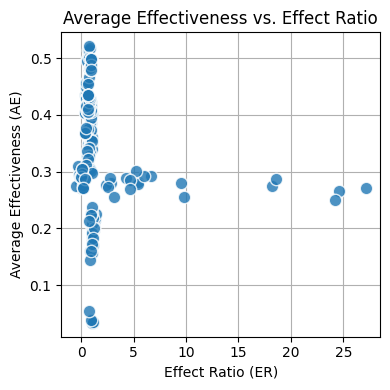

In [ ]:
# Prepare data
data = df.drop_duplicates()[["run_id", "ndcg_cut_10_ap", "ndcg_cut_10_er"]]

# Create plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_axisbelow(True)
ax.scatter(
    data["ndcg_cut_10_er"],
    data["ndcg_cut_10_ap"],
    s=80,          # marker size (adjust as needed)
    c="C0",        # marker color (optional)
    alpha=0.8,      # transparency (optional)
    edgecolors='w',  # white edge color for better visibility
)

# Labels and title
ax.set_xlabel("Effect Ratio (ER)")
ax.set_ylabel("Average Effectiveness (AE)")
ax.set_title("Average Effectiveness vs. Effect Ratio")

# Grid and tight layout
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [12]:
df.round(3)

,snapshot,team,run_id,version,ndcg_cut_10_ap,ndcg_cut_10_arp,ndcg_cut_10_dri,ndcg_cut_10_er,ndcg_cut_10_rc,ndcg_cut_10_ttest
0,2023-04,clef25-seupd2425-racoon,run4,2025-05-21-11-05-01,0.381,0.384,0.060,0.869,-0.014,0.369
1,2023-05,clef25-seupd2425-racoon,run4,2025-05-21-11-05-01,0.381,0.385,0.018,0.975,-0.018,0.273
2,2023-06,clef25-seupd2425-racoon,run4,2025-05-21-11-05-01,0.394,0.411,0.043,0.975,-0.087,0.000
3,2023-07,clef25-seupd2425-racoon,run4,2025-05-21-11-05-01,0.375,0.372,0.029,0.917,0.016,0.353
4,2023-08,clef25-seupd2425-racoon,run4,2025-05-21-11-05-01,0.349,0.320,0.074,0.693,0.154,0.000
...,...,...,...,...,...,...,...,...,...,...
225,2023-04,clef25-seupd2425-rise,clef25-seupd2425-rise,2025-05-20-16-03-41,0.483,0.477,0.141,0.853,0.025,0.045
226,2023-05,clef25-seupd2425-rise,clef25-seupd2425-rise,2025-05-20-16-03-41,0.487,0.485,0.064,0.939,0.007,0.601
227,2023-06,clef25-seupd2425-rise,clef25-seupd2425-rise,2025-05-20-16-03-41,0.498,0.507,0.131,0.918,-0.038,0.008
228,2023-07,clef25-seupd2425-rise,clef25-seupd2425-rise,2025-05-20-16-03-41,0.480,0.471,0.073,0.903,0.037,0.007


In [19]:
EXCLUDE = [
    {"run_id": "test-system-maik-1234567", "version": "2025-01"},
    {"run_id": "bm25+reranker", "version": "2025-05-19-15-39-38"},
    {"run_id": "bm25+reranker", "version": "2025-05-21-12-45-30"},
    {"run_id": "bm25+reranker", "version": "2025-05-21-15-04-09"},
    {"run_id": "bm25+reranker", "version": "2025-05-22-15-40-14"},
    {"run_id": "bm25+reranker", "version": "2025-05-22-16-08-06"},
    {"run_id": "bm25+reranker", "version": "2025-05-22-16-11-21"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-08-15"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-08-52"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-09-00"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-09-08"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-09-26"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-09-34"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-09-43"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-09-57"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-10-09"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-10-21"},
    {"run_id": "bm25+reranker", "version": "2025-05-21-12-54-02"},
    {"run_id": "bm25+reranker", "version": "2025-05-22-15-51-48"},
    {"run_id": "bm25+reranker", "version": "2025-05-21-12-45-30"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-08-27"},
    {"run_id": "bm25+reranker", "version": "2025-05-24-18-08-35"},
    {"run_id": "bm25+reranker+weighted", "version": "2025-05-26-14-37-40"},
    {"run_id": "bm25+reranker+weighted", "version": "2025-05-26-14-36-24"},
    {"run_id": "bm25+reranker+weighted", "version": "2025-05-26-14-37-56"},
    {"run_id": "bm25+reranker+weighted", "version": "2025-05-26-14-34-01"},
    {"run_id": "bm25+reranker+weighted", "version": "2025-05-26-14-33-04"},
    # web
    {
        "run_id": "clef25-seupd2425-rise",
        "version": "2025-05-20-15-47-16",
    },
    {
        "run_id": "clef25-seupd2425-rise",
        "version": "2025-05-20-16-20-56",
    },
    {
        "run_id": "clef25-seupd2425-rise",
        "version": "2025-05-20-15-55-39",
    },
    {
        "run_id": "clef25-seupd2425-rise",
        "version": "2025-05-20-15-38-06",
    },
    {
        "run_id": "query_expansion_time_dependence",
        "version": "2025-05-24-22-54-13",
    }
]


def results_table(df, measure, sort_by=(), output=None, snapshots=None):
    def fix_run_tags(row, run_ids):
        """fix run_ids to include version if there are multiple versions"""
        if row["run_id"] in run_ids:
            return row["run_id"] + " (v" + row["version"] + ")"
        else:
            return row["run_id"]

    # ranme columns and strip measure
    df = df.rename(columns=lambda x: x.replace(measure + "_", ""))
    df = df[["team", "run_id", "version", "snapshot", "arp", "ap", "rc", "dri", "er", "ttest"]]
    
    columns = df.columns
    indices = ["team", "run_id", "version", "snapshot", "ttest"]
    columns = [col for col in columns if col not in indices]
    table = df.copy()
    
    # filter out excluded runs
    for exclusion in EXCLUDE:
        table = table[
            ~(
                (table["run_id"] == exclusion["run_id"])
                & (table["version"] == exclusion["version"])
            )
        ]
    # filter out snapshots
    if snapshots:
        table = table[table["snapshot"].isin(snapshots)]
        
    # Remove results where everything except the version is the same
    table = table.drop_duplicates(subset=df.columns.difference(['version']))

    # Fix run_ids and rem,ove version
    run_ids = table[table.duplicated(["run_id", "snapshot"])]["run_id"].unique()
    table["run_id"] = table.apply(lambda row: fix_run_tags(row, run_ids), axis=1)
    table.drop(columns=["version"], inplace=True)

    # Fix team names
    table["team"] = table["team"].str.replace("clef25-", "")
    table.drop(columns=["team"], inplace=True)

    # Pivot the table to have snapshots as columns
    table = table.pivot(index=["run_id"], columns="snapshot", values=columns)
    # table.columns = table.columns.swaplevel(0, 1)
    # table = table.sort_index(axis=1, level=0)  # Optional: sort by snapshot
    table = table.reset_index()
    
    # Sort
    if sort_by:
        table = table.sort_values(by=sort_by, ascending=False)

    # round
    table = table.round(3)

    if output:
        table.to_latex(
            output,
            caption=f"Evaluation Results for . The results are sorted by {sort_by[0]} for the {sort_by[1]} snapshot.",
            label="tab:xxx-results",
            column_format="l" + "c" * (len(table.columns) - 1),
            multicolumn=True,
            multirow=True,
            escape=True,
            index_names=True,
            float_format="%.3f",
            index=False        )
    print(table)

results_table(df, measure="ndcg_cut_10", sort_by=("rc", "2023-08"), snapshots=("2023-03", "2023-08"), output="results-table-change-web-long.tex")

                                             run_id     arp      ap      rc  \
snapshot                                            2023-08 2023-08 2023-08   
27                                             run2   0.320   0.403   0.344   
26                                             run1   0.371   0.459   0.322   
28                                             run3   0.328   0.405   0.320   
21                 query-variants-qrel-boost-kmeans   0.342   0.415   0.298   
1                               baseline-qrel-boost   0.376   0.456   0.297   
20                 query-variants-qrel-boost-dbscan   0.309   0.368   0.276   
19                        query-variants-qrel-boost   0.309   0.368   0.276   
2                       baseline-relevance-feedback   0.319   0.377   0.266   
23         query-variants-relevance-feedback-kmeans   0.217   0.250   0.235   
7                             clef25-seupd2425-rise   0.383   0.436   0.217   
22         query-variants-relevance-feedback-dbscan 